# 推測統計の基本

## 母集団と標本

### 標本の抽出方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [9]:
np.random.choice([1, 2, 3], 3)

array([2, 2, 3])

In [11]:
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 1, 3])

In [13]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [14]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [22]:
np.random.seed(0)
np.random.choice(scores, 20).mean()

70.400

In [7]:
scores.mean()

69.530

In [23]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample.mean())

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15


## 確率モデル

### 確率の基本

### 確率分布

In [24]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [38]:
for i in range(100):
    
    dice_value = np.random.choice(dice, p=prob)
    if dice_value == 2:
        print(f'Now i is {i}')
        print(f'Dice value is {dice_value}')

Now i is 2
Dice value is 2
Now i is 3
Dice value is 2
Now i is 11
Dice value is 2
Now i is 19
Dice value is 2
Now i is 20
Dice value is 2
Now i is 21
Dice value is 2
Now i is 22
Dice value is 2
Now i is 45
Dice value is 2
Now i is 66
Dice value is 2
Now i is 74
Dice value is 2
Now i is 76
Dice value is 2
Now i is 93
Dice value is 2


In [40]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 6, 4, 5, 4, 3, 4, 3, 6, 5, 4, 1, 5, 5, 1, 6, 5, 4, 3, 6, 4, 4,
       5, 6, 4, 6, 5, 4, 5, 4, 5, 5, 6, 4, 1, 6, 4, 6, 5, 3, 5, 6, 2, 3,
       2, 6, 1, 2, 3, 6, 3, 4, 4, 5, 6, 6, 2, 5, 6, 6, 3, 6, 3, 6, 1, 2,
       5, 4, 2, 6, 6, 3, 4, 5, 5, 6, 2, 1, 5, 4, 3, 2, 2, 6, 4, 4, 1, 4,
       5, 5, 6, 5, 4, 4, 6, 6, 3, 5, 5, 4])

In [45]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数':freq,
              '相対度数':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='出目'))

freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame(
    {'度数': freq,
     '相対度数': freq / num_trial},
    index = pd.Index(np.arange(1, 7), name='出目')
)

,度数,相対度数
出目,,
1,7,0.07
2,9,0.09
3,12,0.12
4,23,0.23
5,23,0.23
6,26,0.26


In [46]:
freq

array([ 7,  9, 12, 23, 23, 26])

/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/cor

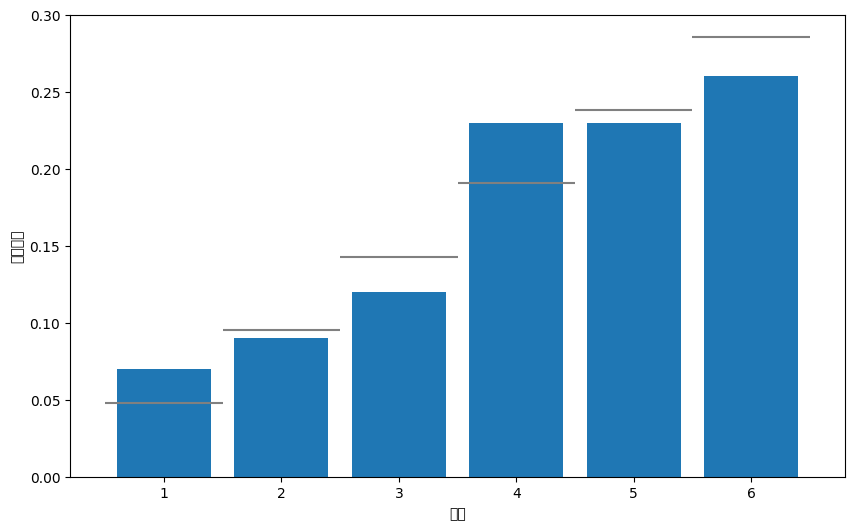

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 真の確率分布を横線で表示
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 棒グラフの[1.5, 2.5, ..., 6.5]の場所に目盛りをつける
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 目盛りの値は[1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/cor

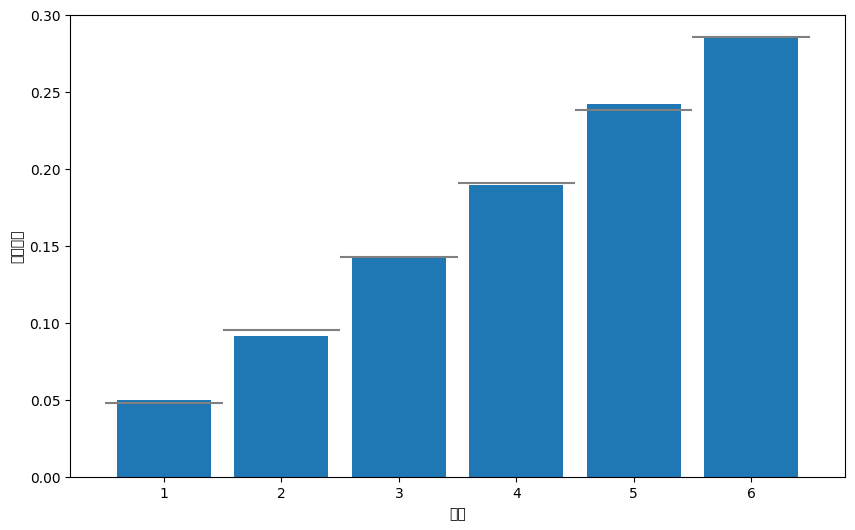

In [48]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

In [49]:
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

## 推測統計における確率

/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/cor

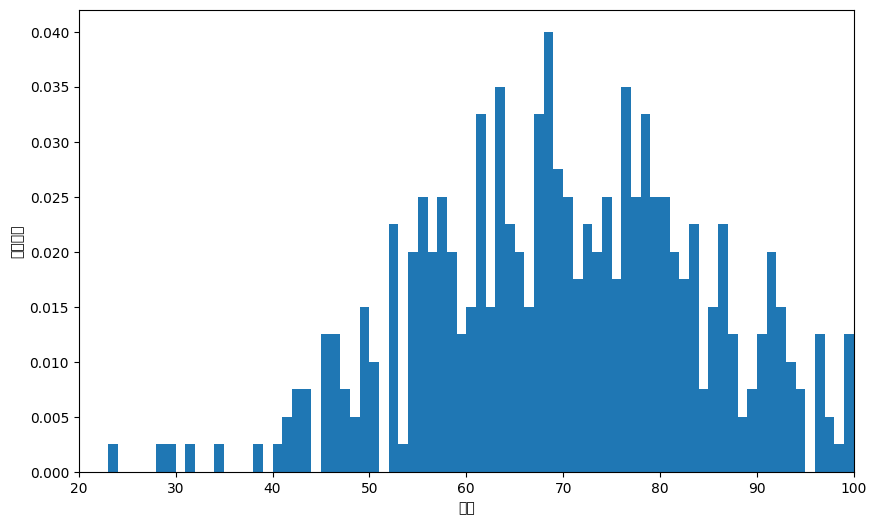

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

In [51]:
np.random.choice(scores)

83

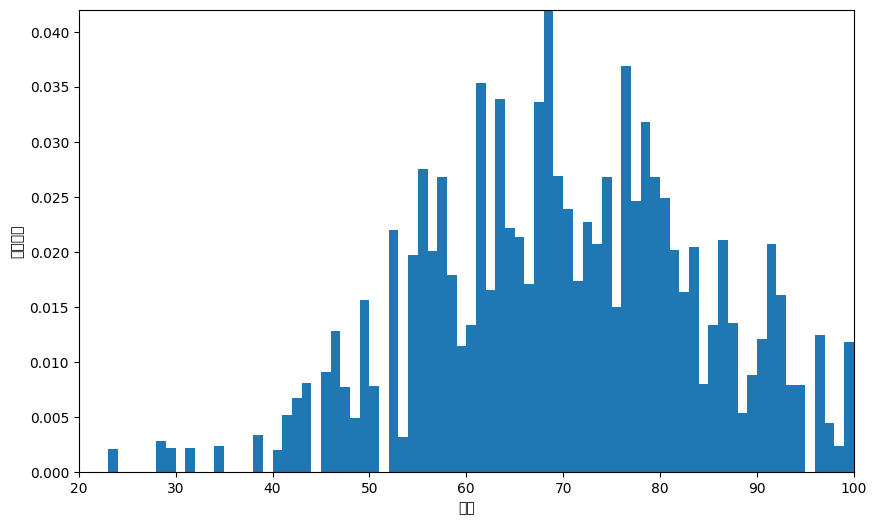

In [52]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

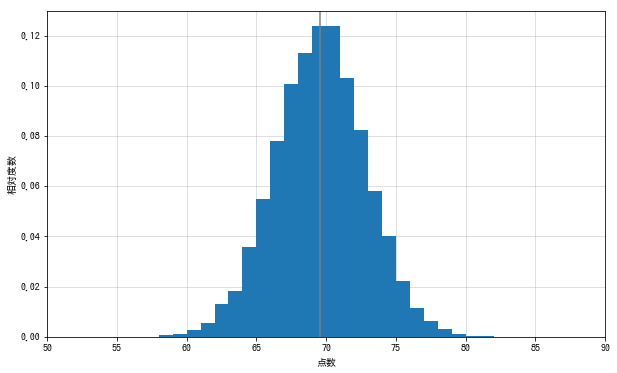

In [18]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 母平均を縦線で表示
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

## これから学ぶこと